
## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.utils.data as data_utils
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
import sklearn
from torch.utils.data.sampler import SubsetRandomSampler

import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *

import warnings
warnings.filterwarnings('ignore')

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu' # temporarily
# Fix random seeds for reproducibility
seed = 73
#torch.manual_seed(seed)
#np.random.seed(seed)a
import sys,os 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
import optuna

In [28]:
monopole = True; projection = True
L=4; dn=2; field= "HI"; sims='TNG'

study_name = "{}_{}_l_{}_dn_{}_m_{}_p_{}".format(sims, field,L,dn,int(monopole),int(projection))
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
study = optuna.load_study(study_name=study_name, storage=storage)
df = study.trials_dataframe(attrs=("number", "value", "params", "state"))
df

StorageInternalError: An exception is raised during the commit. This typically happens due to invalid data in the commit, e.g. exceeding max length. 

In [29]:
monopole = True; projection = True
L=4; dn=2; field= "HI"; sim='TNG'
study_name = 'TNG_HI_'
study_name += "l_{}_dn_{}_m_{}_p_{}".format(L,dn,int(monopole),int(projection))
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim,field=field, L=L, dn=dn, normalization=True, projection=projection, average=False, monopole=monopole)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=None, which_machine='vib', print_loss=True,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
#mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

StorageInternalError: An exception is raised during the commit. This typically happens due to invalid data in the commit, e.g. exceeding max length. 

In [30]:
monopole = True; projection = True
L=4; dn=2; field= "HI"; sims='TNG_SIMBA'

study_name = "{}_{}_l_{}_dn_{}_m_{}_p_{}".format(sims, field,L,dn,int(monopole),int(projection))
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
study = optuna.load_study(study_name=study_name, storage=storage)
df = study.trials_dataframe(attrs=("number", "value", "params", "state"))
df

,number,value,params_dropout,params_fd,params_fe,params_gamma,params_lr,params_z_dim,state
0,0,-8.477227,0.542229,0.298988,0.377987,0.000422,1.700230e-05,309,COMPLETE
1,1,-8.690484,0.894932,0.433122,0.342018,0.000238,2.329405e-04,1761,COMPLETE
2,2,NaN,0.439764,0.407292,0.993246,0.007343,2.010614e-08,1302,RUNNING
3,3,NaN,0.280153,0.193989,0.181433,0.000248,8.952464e-05,267,RUNNING
4,4,NaN,0.259732,0.406562,0.377624,0.000911,4.606911e-07,660,RUNNING
5,5,-8.694422,0.858550,0.977364,0.348629,0.015581,7.261302e-04,1780,COMPLETE
6,6,NaN,0.275930,0.441158,0.128191,0.004438,2.171642e-05,317,RUNNING
7,7,NaN,0.137771,0.710102,0.144776,0.001444,4.417021e-07,1077,RUNNING
8,8,NaN,0.598831,0.733469,0.308917,0.006222,1.976659e-07,1858,RUNNING
9,9,NaN,0.833799,0.851608,0.204987,0.000472,2.315001e-05,276,RUNNING


In [31]:
monopole = True; projection = True
L=10; dn=0; field= "HI"; sims='TNG'

study_name = "{}_{}_l_{}_dn_{}_m_{}_p_{}".format(sims, field,L,dn,int(monopole),int(projection))
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
study = optuna.create_study(study_name=study_name, storage=storage, load_if_exists=True)
df = study.trials_dataframe(attrs=("number", "value", "params", "state"))
df

[I 2023-04-19 15:54:43,784] Using an existing study with name 'TNG_HI_l_10_dn_0_m_1_p_1' instead of creating a new one.


,number,value,params_dropout,params_fd,params_fe,params_gamma,params_lr,params_z_dim,state
0,0,NaN,NaN,NaN,NaN,NaN,NaN,330.0,FAIL
1,1,-8.545349,0.631568,0.222123,0.524469,0.001106,5.413357e-04,914.0,COMPLETE
2,2,-9.910480,0.228214,0.667693,0.111394,0.006717,2.340633e-07,1694.0,COMPLETE
3,3,NaN,NaN,NaN,NaN,NaN,NaN,716.0,FAIL
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAIL
5,5,NaN,NaN,0.918486,0.759112,NaN,NaN,314.0,FAIL
6,6,2.418858,0.500705,0.920416,0.669361,0.051355,2.870863e-08,1398.0,COMPLETE
7,7,-8.543642,0.526967,0.535828,0.841439,0.039912,7.739134e-05,441.0,COMPLETE
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAIL
9,9,-8.436295,0.242109,0.858770,0.728734,0.016209,1.351012e-06,1583.0,COMPLETE


num_trial=34, params={'dropout': 0.034264619481976163, 'fd': 0.3769087871470421, 'fe': 0.020218956268121282, 'gamma': 0.000665969213336715, 'lr': 0.00020096493777290169, 'z_dim': 1372} 


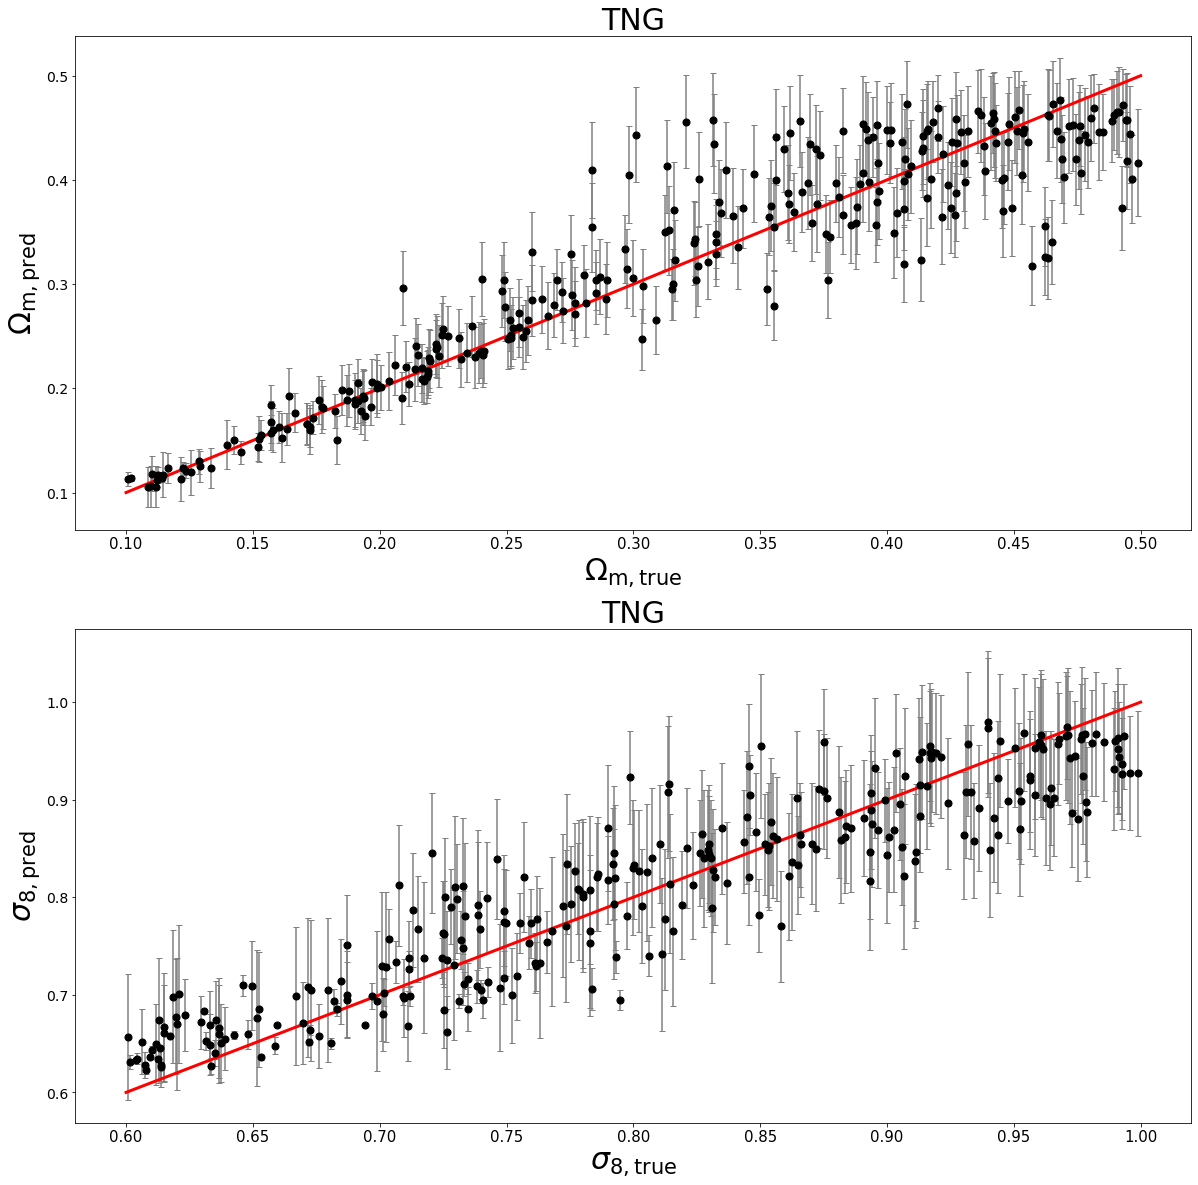

In [36]:
monopole = True; projection = True
L=10; dn=0; field= "HI"; sims='TNG'

study_name = "{}_{}_l_{}_dn_{}_m_{}_p_{}".format(sims, field,L,dn,int(monopole),int(projection))
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim,field=field, L=L, dn=dn, normalization=True, projection=True, average=False, monopole=True, proc_imag=np.absolute)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=None, which_machine='vib', print_loss=True,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
#mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

In [40]:
monopole = True; projection = True
L=4; dn=0; field= "HI"; sims='TNG'

study_name = "{}_{}_l_{}_dn_{}_m_{}_p_{}".format(sims, field,L,dn,int(monopole),int(projection))
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
study = optuna.create_study(study_name=study_name, storage=storage, load_if_exists=True)
df = study.trials_dataframe(attrs=("number", "value", "params", "state"))

[I 2023-04-19 11:45:33,015] Using an existing study with name 'TNG_HI_l_4_dn_0_m_1_p_1' instead of creating a new one.


In [51]:
df

,number,value,params_dropout,params_fd,params_fe,params_gamma,params_lr,params_z_dim,state
0,0,-8.284090,0.686605,0.861844,0.803835,0.020806,0.003032,1354.0,COMPLETE
1,1,-9.636986,0.007892,0.061008,0.687302,0.000101,0.000986,167.0,COMPLETE
2,2,-7.896029,0.728131,0.584568,0.024232,0.000642,0.000037,1559.0,COMPLETE
3,3,-8.535135,0.475524,0.593885,0.247204,0.000490,0.000121,924.0,COMPLETE
4,4,-8.442824,0.731308,0.086779,0.998156,0.000547,0.000012,887.0,COMPLETE
...,...,...,...,...,...,...,...,...,...
78,78,-11.775175,0.001132,0.104944,0.811747,0.060416,0.000082,1305.0,COMPLETE
79,79,-8.542551,0.072348,0.097568,0.824247,0.023571,0.000341,1378.0,COMPLETE
80,80,-8.546200,0.055483,0.149746,0.756983,0.058202,0.000096,1330.0,COMPLETE
81,81,-8.548079,0.049066,0.151350,0.747646,0.006311,0.000237,1338.0,COMPLETE


In [48]:
ndf = df.to_numpy()

In [53]:
df[ndf[:,1]<-11]

,number,value,params_dropout,params_fd,params_fe,params_gamma,params_lr,params_z_dim,state
26,26,-11.446137,0.098700,0.922713,0.170730,0.028315,0.000121,540.0,COMPLETE
36,36,-11.532373,0.003684,0.022697,0.796703,0.087891,0.000013,1724.0,COMPLETE
37,37,-11.601036,0.051350,0.021119,0.757716,0.072893,0.000043,1292.0,COMPLETE
38,38,-11.569708,0.021249,0.036380,0.646108,0.096769,0.000012,1270.0,COMPLETE
51,51,-11.174390,0.133545,0.017932,0.857322,0.092029,0.000014,1229.0,COMPLETE
54,54,-11.238676,0.127921,0.013492,0.940103,0.016053,0.000010,1745.0,COMPLETE
55,55,-11.050619,0.109507,0.011785,0.908406,0.013728,0.000011,1131.0,COMPLETE
56,56,-11.062621,0.156808,0.028285,0.895004,0.010377,0.000012,1140.0,COMPLETE
58,58,-11.330801,0.123713,0.028377,0.865523,0.016624,0.000153,1133.0,COMPLETE
59,59,-11.840117,0.113220,0.150346,0.888083,0.015370,0.000216,1080.0,COMPLETE


num_trial=37, params={'dropout': 0.05134966608489666, 'fd': 0.02111894711711476, 'fe': 0.7577163480853678, 'gamma': 0.07289325436974407, 'lr': 4.3003350948803365e-05, 'z_dim': 1292} 


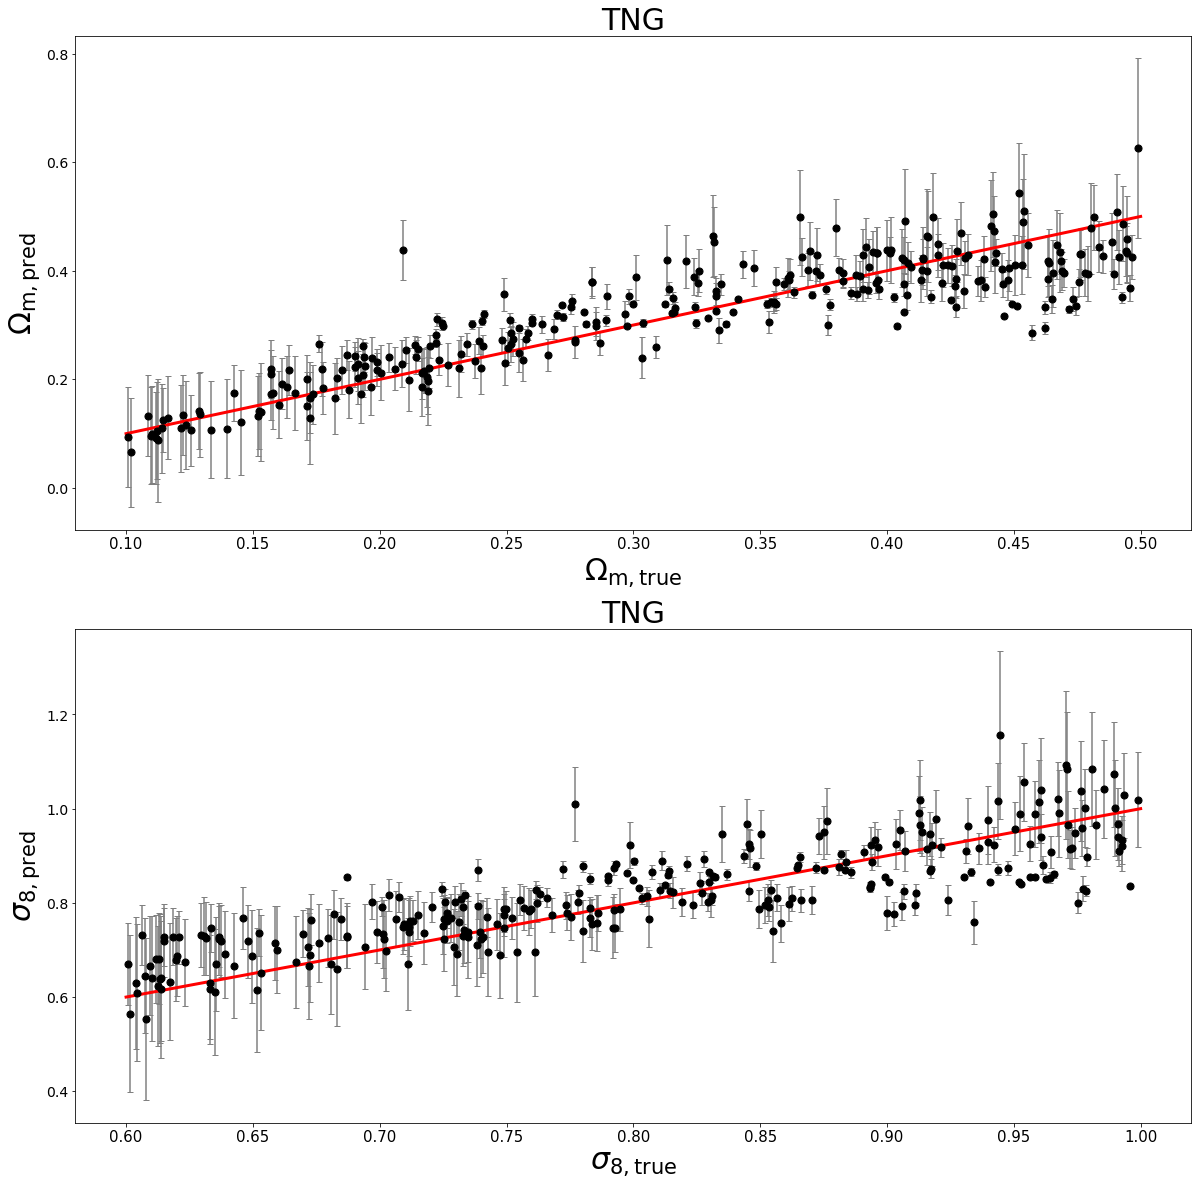

In [60]:
monopole = True; projection = True
L=4; dn=0; field= "HI"; sim='TNG'
study_name = 'TNG_HI_'
study_name += "l_{}_dn_{}_m_{}_p_{}".format(L,dn,int(monopole),int(projection))
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=sim,field=field, L=4, dn=0, normalization=True, projection=projection, average=False, monopole=monopole)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=None, which_machine='vib', print_loss=True,
                        num_trial=37)
mist.make_plots(show_plot=True, data_return=False)
#mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

$\Omega_m$: MSE=0.196, % error=126.150%, R2 score=-13.703,chi2=9173.923, bias=-1.118
$\sigma_8$: MSE=1.134, % error=120.284%, R2 score=-84.046,chi2=636.443, bias=-1.198
$\Omega_m$: MSE=0.020, % error=31.330%, R2 score=-0.505,chi2=23359.272, bias=-0.265
$\sigma_8$: MSE=0.071, % error=26.599%, R2 score=-4.335,chi2=190.842, bias=0.247


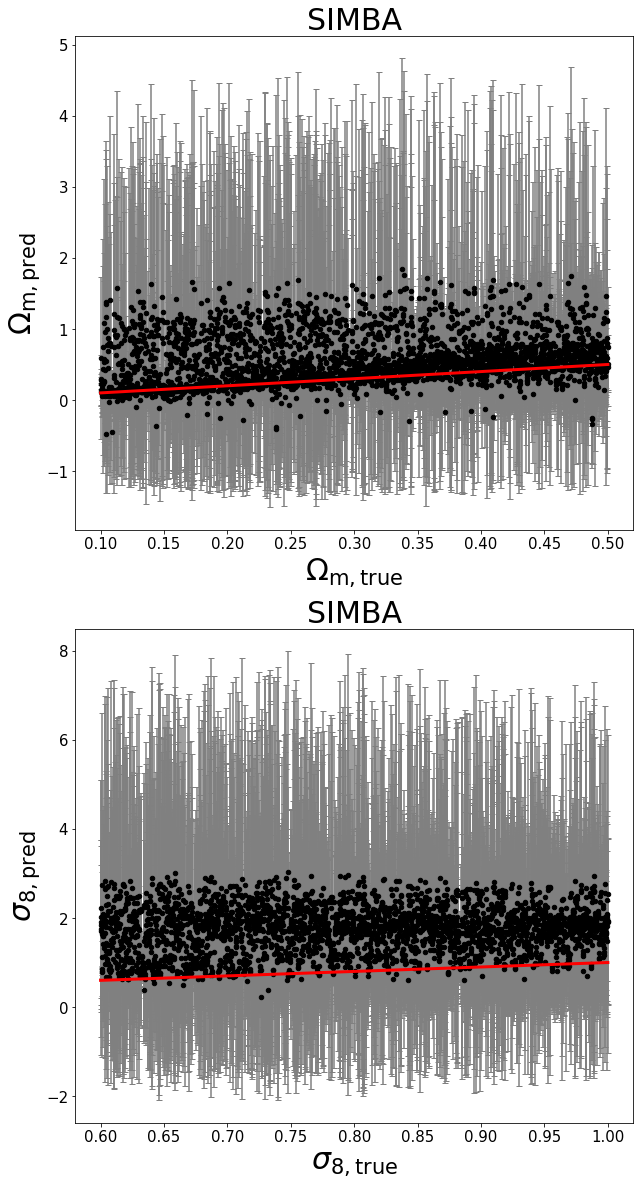

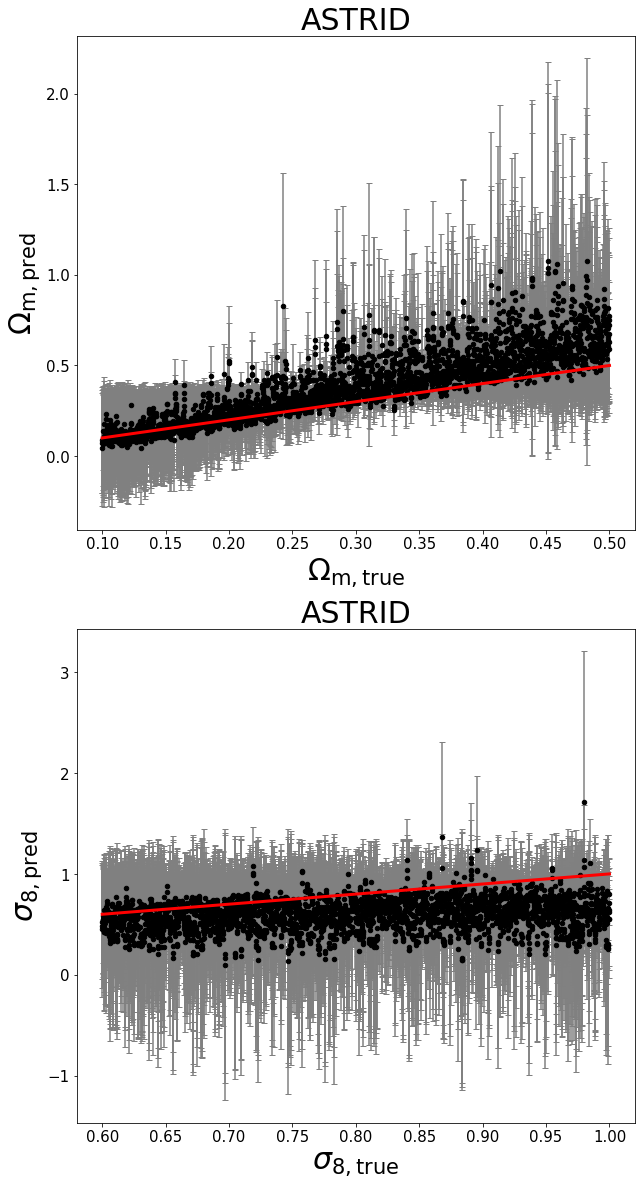

In [61]:
mist.test_on('SIMBA')
mist.test_on('ASTRID')

In [33]:
field = 'HI';
sim   = 'TNG'
study_name = "{}_{}".format(sim,field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=sim,field=field, L=10, dn=0, normalization=True, projection=False, average=False, monopole=True)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=None, which_machine='vib', print_loss=True,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
#mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/home/yjo10/ceph/CAMELS/MIEST/data/wph_IllustrisTNG_HI_for_vib_total_l_10_dn_0.npy'

In [34]:
field = 'HI';
sim   = 'TNG'
study_name = "{}_{}".format(sim,field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=sim,field=field, L=4, dn=0, normalization=True, projection=False, average=False, monopole=True)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=None, which_machine='vib', print_loss=True,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
#mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

KeyError: 'Record does not exist.'

You can't use monopole with projection!
Turning off monopole...
You can't use average with projection!
Turning off average...


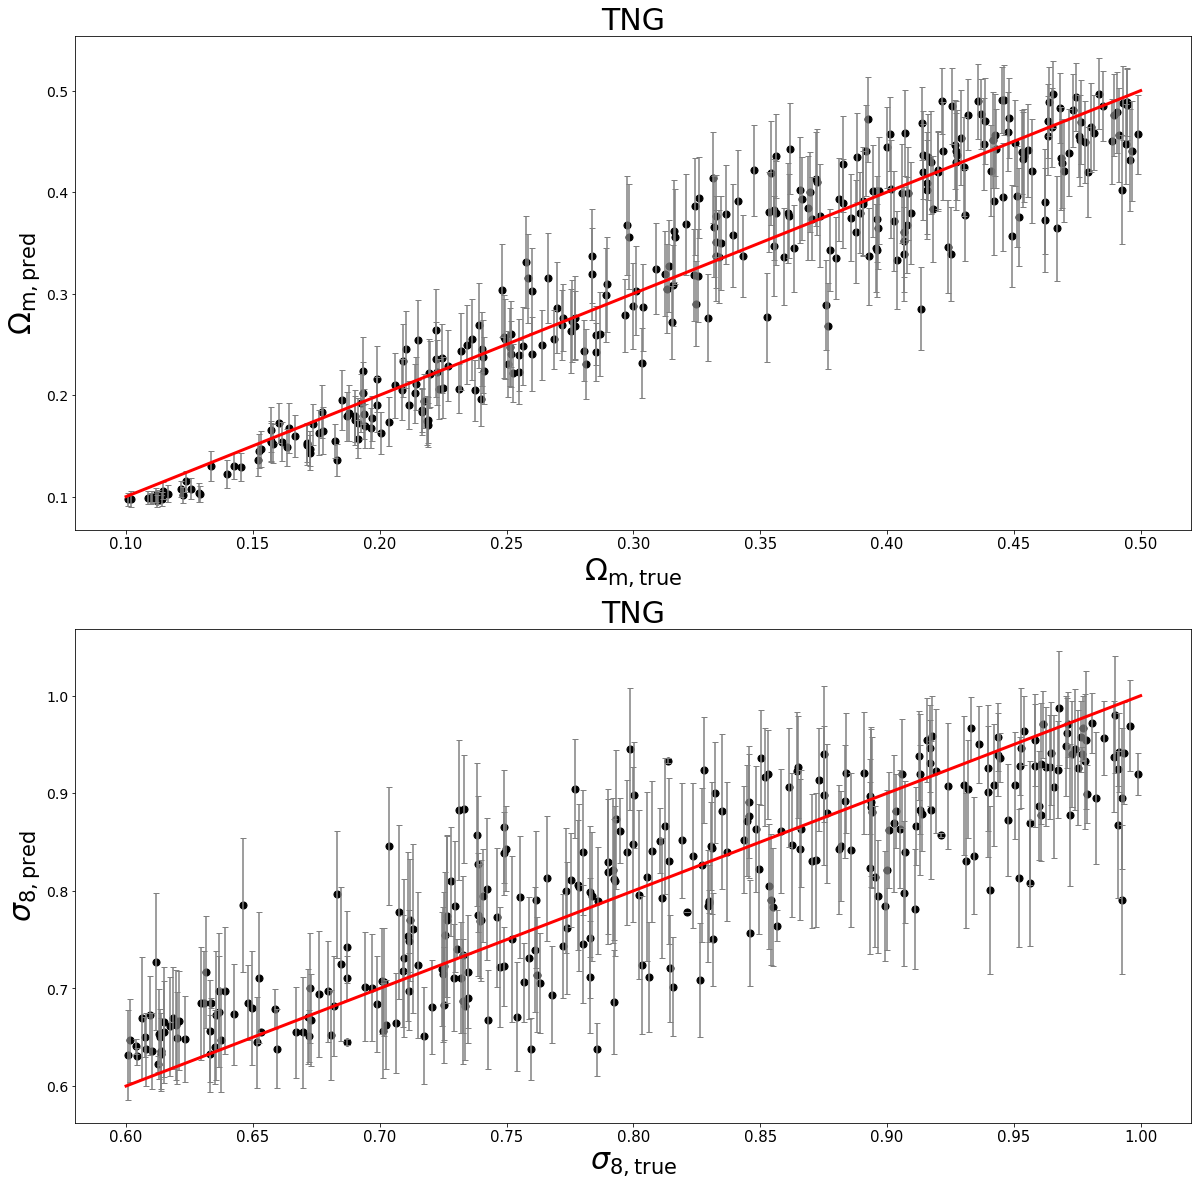

In [50]:
field = 'Mtot';
sim   = 'TNG'
study_name = "TNG_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=sim,field=field, L=4, dn=0, normalization=True, projection=True)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=None, which_machine='vib', print_loss=True,
                        num_trial=339)
mist.make_plots(show_plot=True, data_return=False)
#mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

beta=604.5233220398834, gamma=27.692573788691508


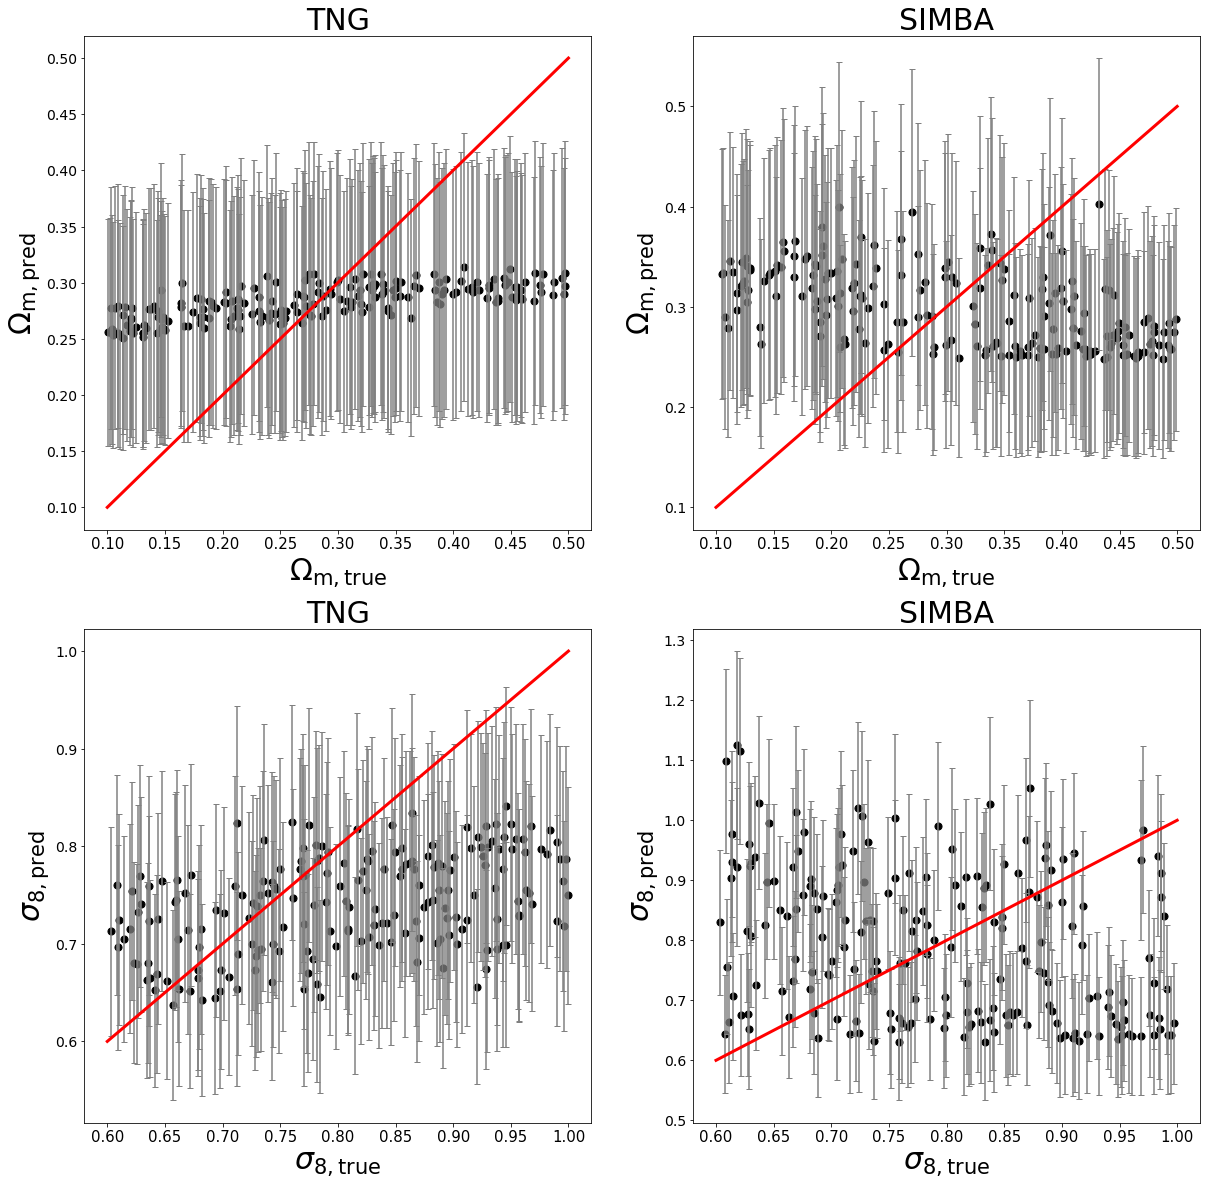

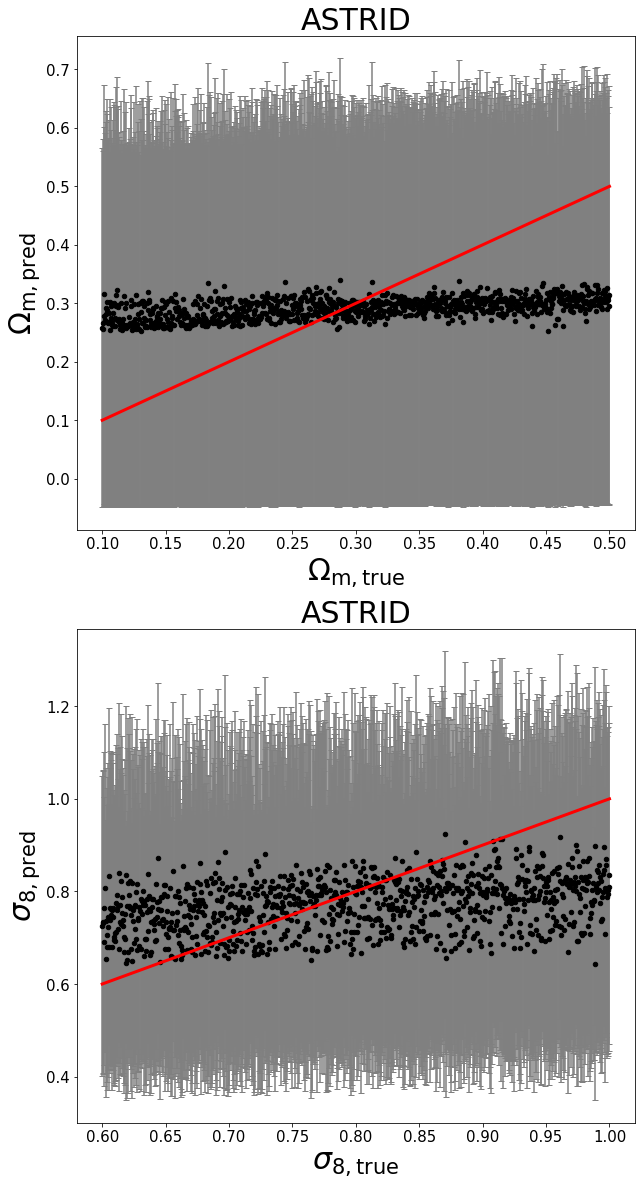

In [4]:
field = 'T';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB_a.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False, normalization=True)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=np.sum, which_machine='vib+cls_a', print_loss=True,
                        num_trial=3)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

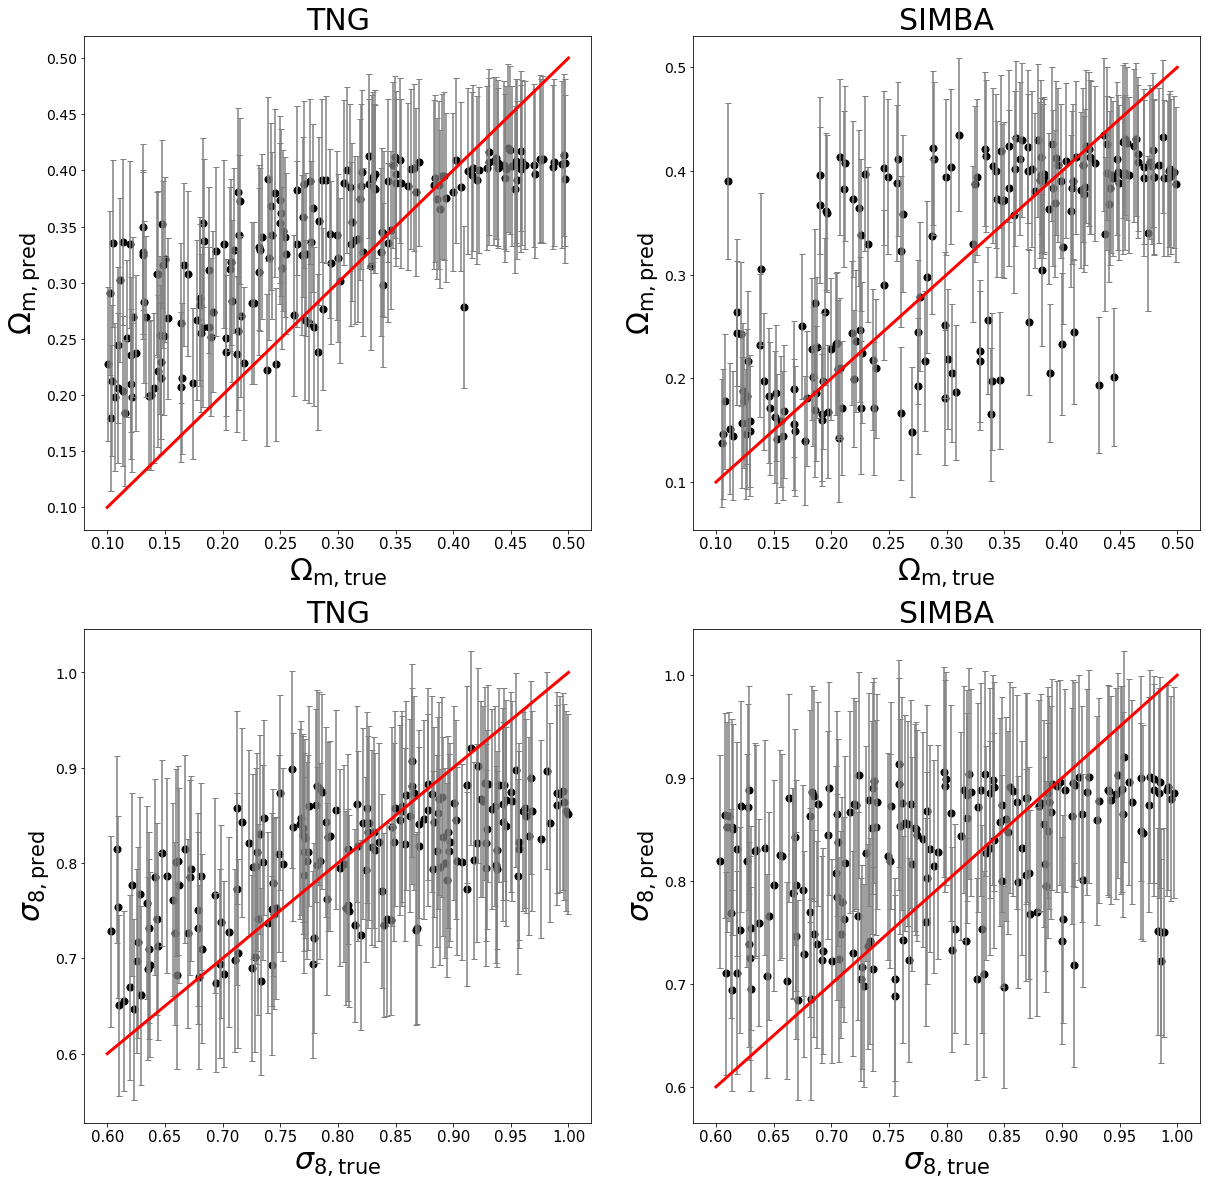

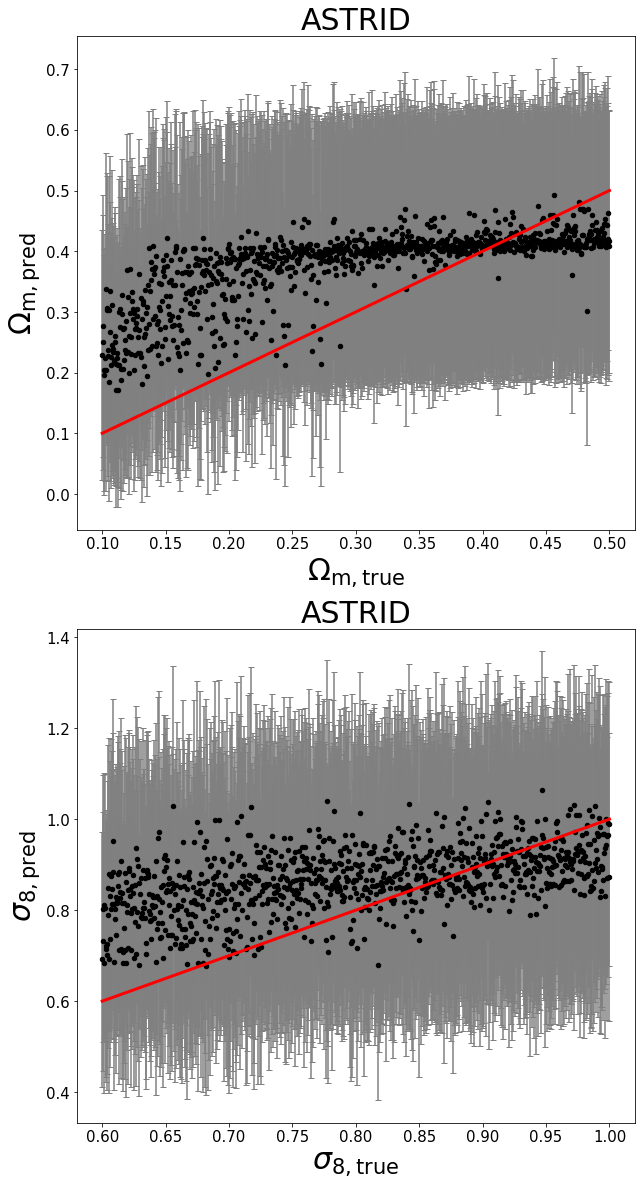

In [5]:
field = 'T';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB_a_0.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=np.sum, which_machine='vib+cls_a',suffix='0_', print_loss=False,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

beta=368.3560522830237, gamma=9.137969467556365


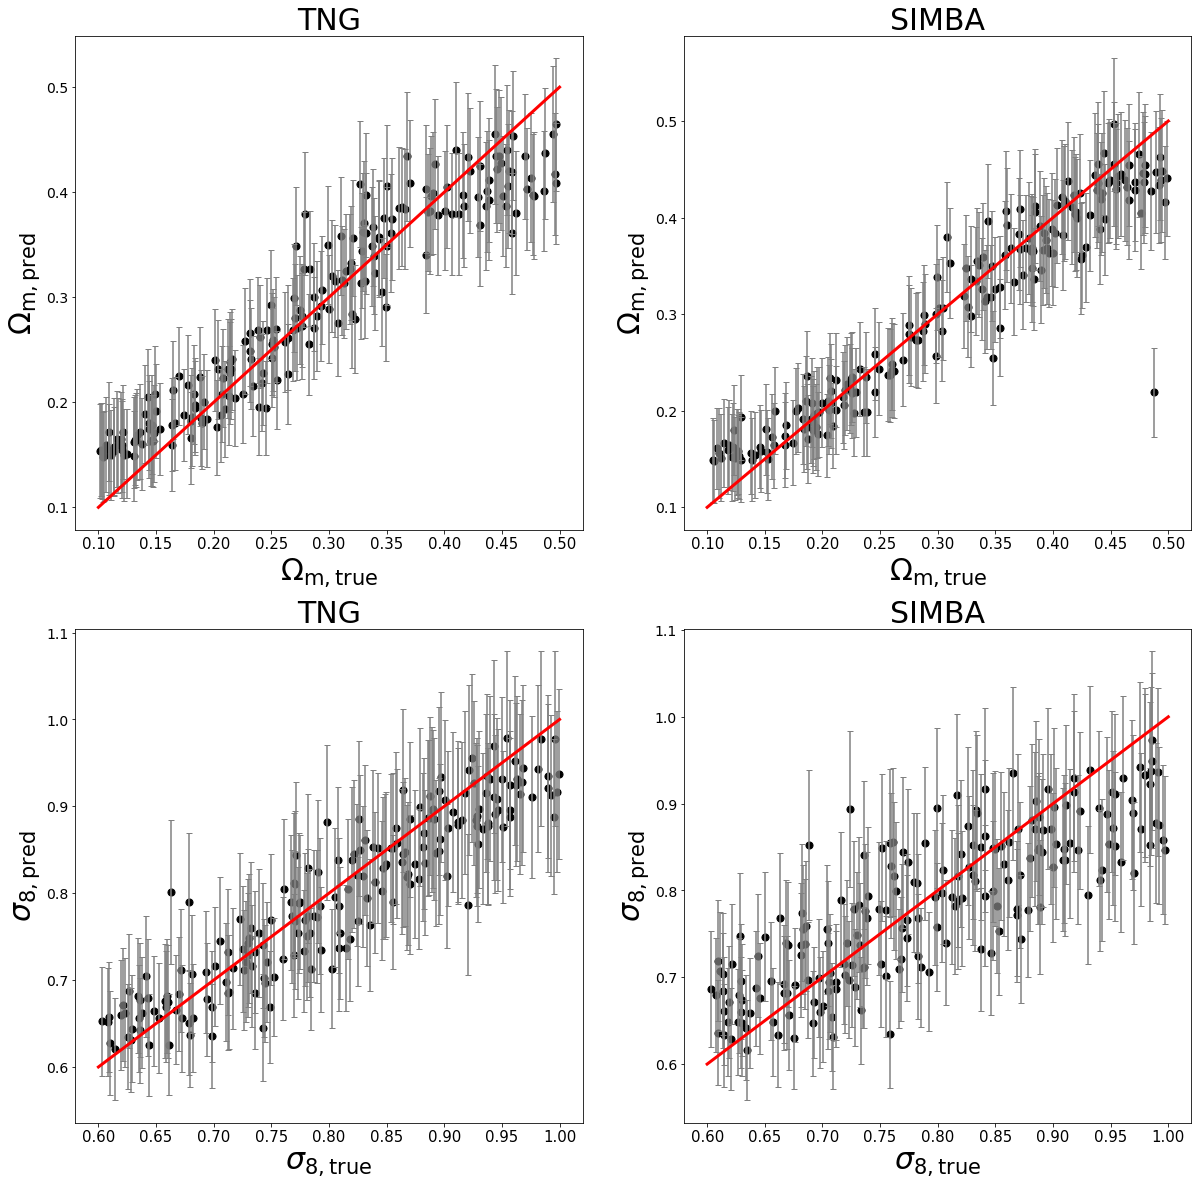

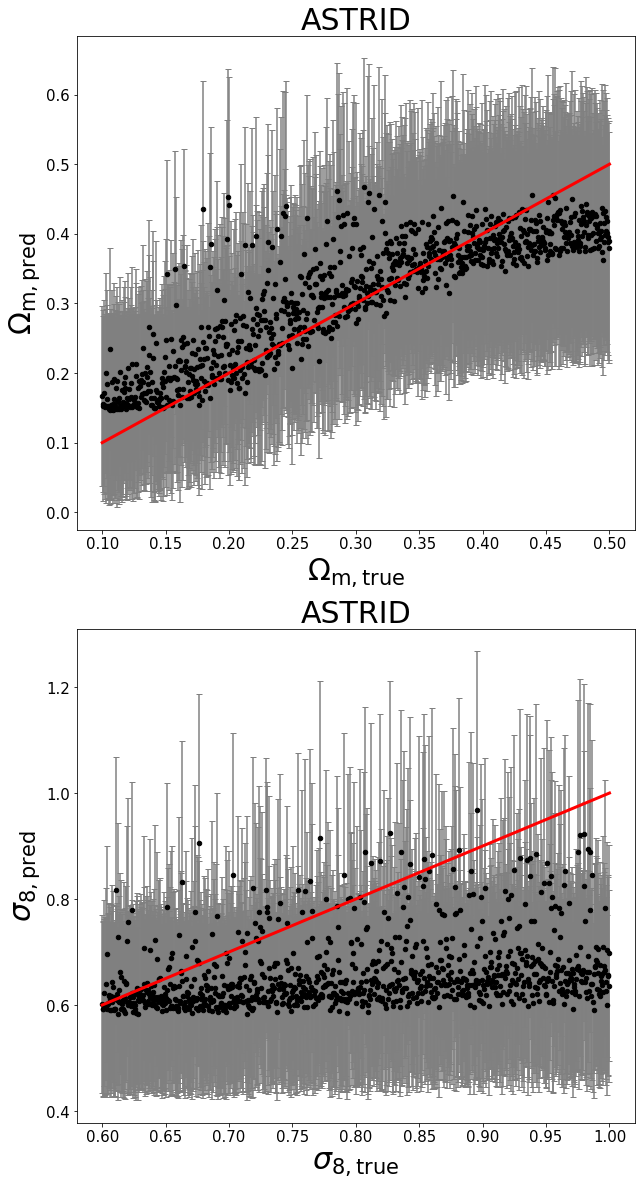

In [36]:
field = 'HI';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB_a.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False, normalization=True)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=metric, which_machine='vib+cls_a', print_loss=True,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

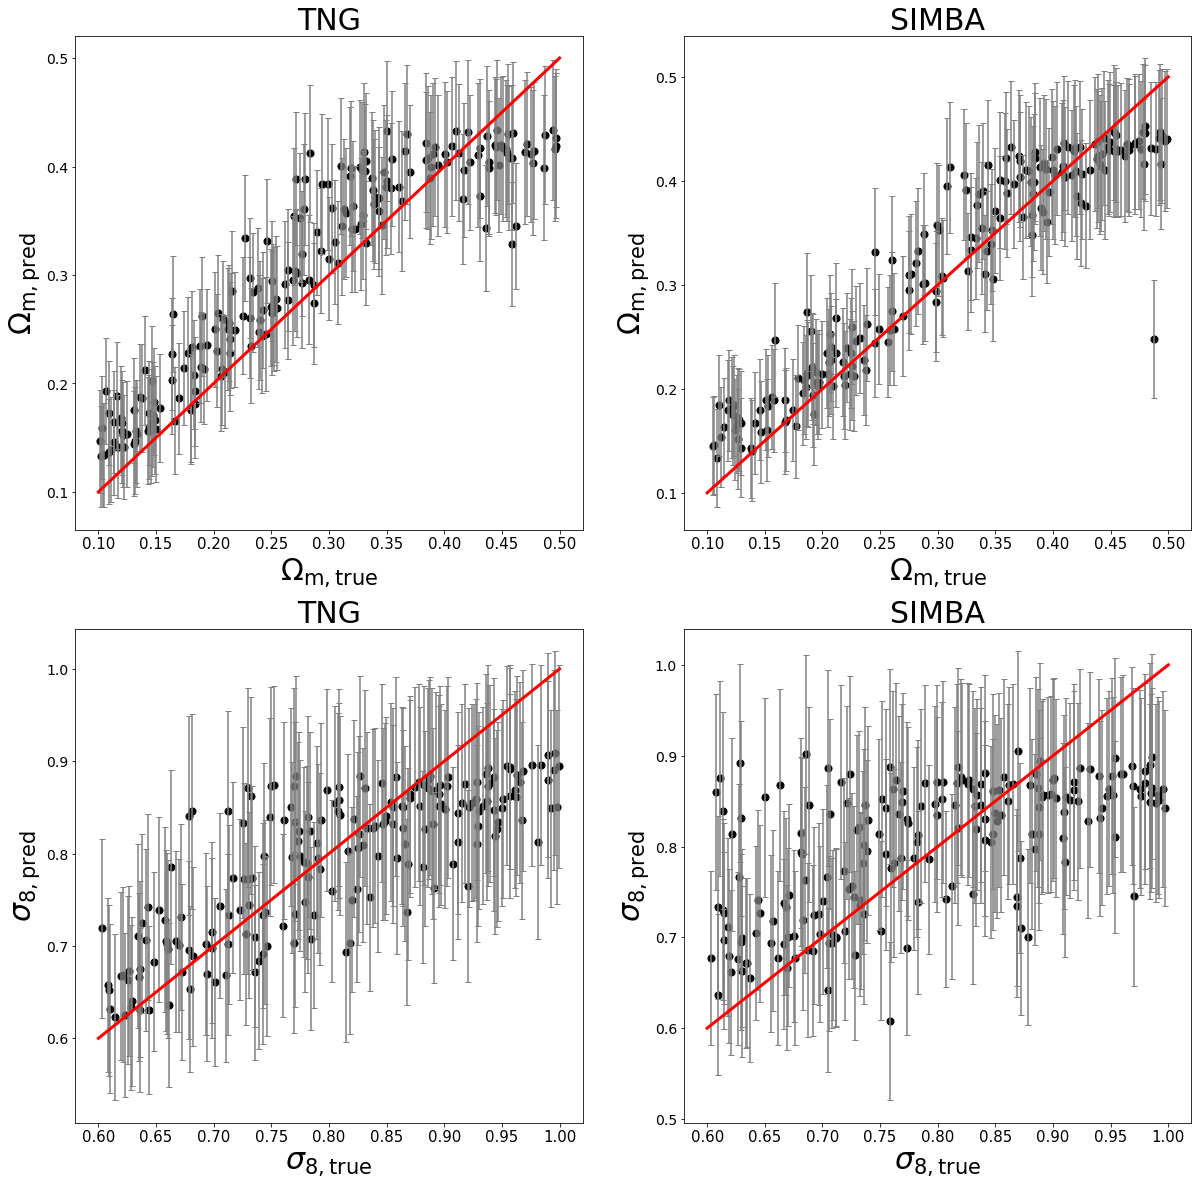

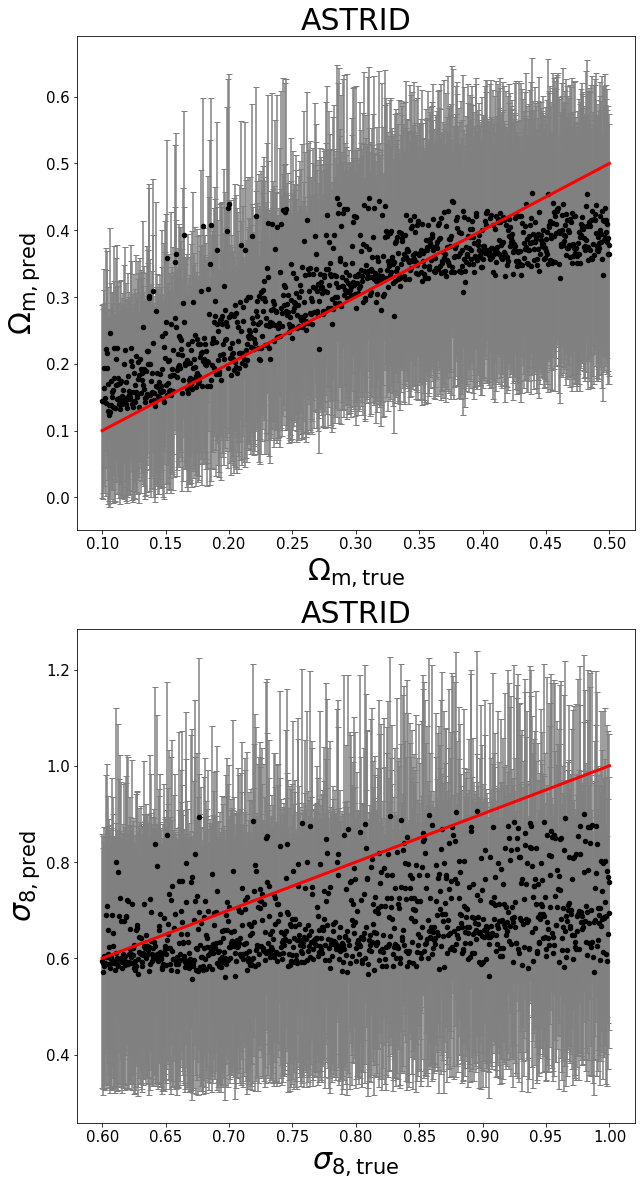

In [23]:
field = 'HI';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB_a_0.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=metric, which_machine='vib+cls_a',suffix='0_', print_loss=False,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

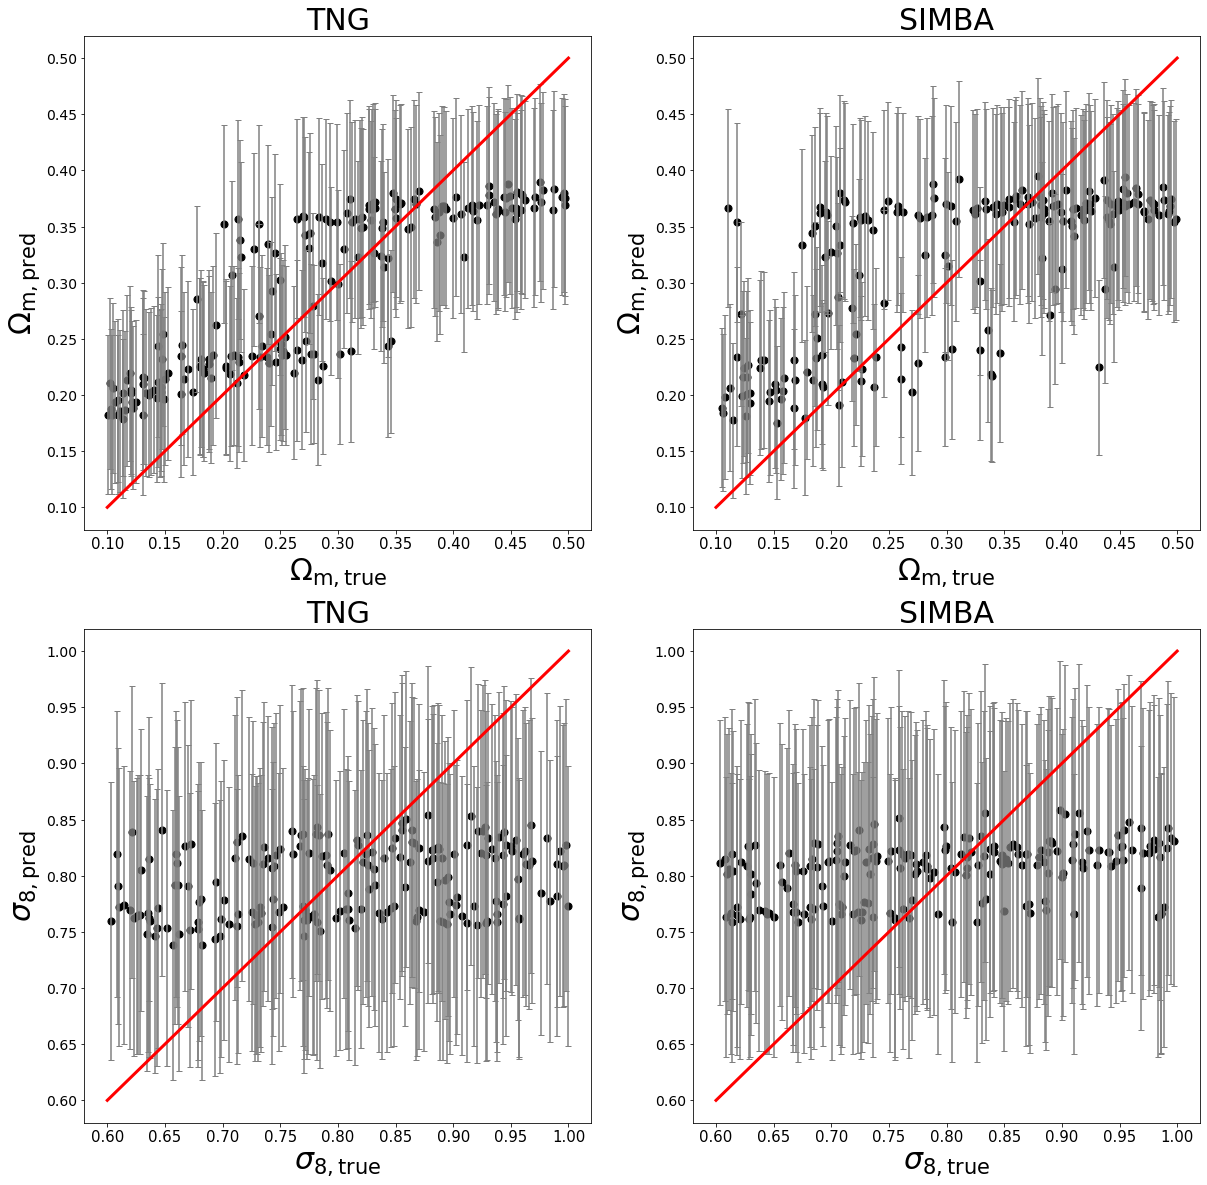

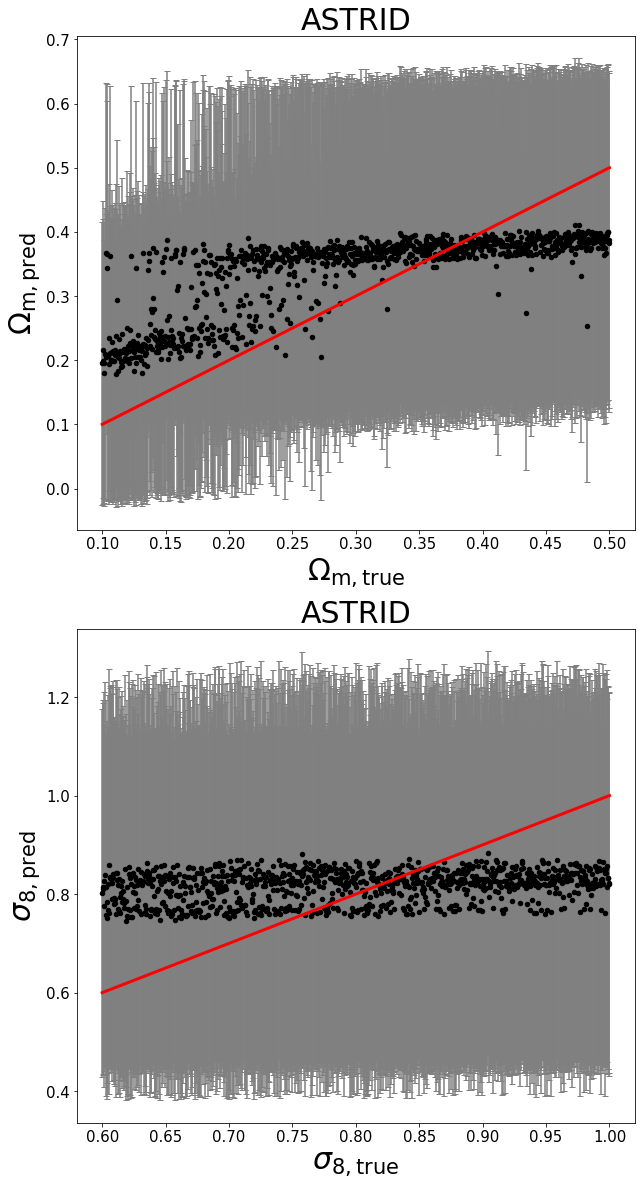

In [24]:
field = 'T';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB_a_0.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=metric, which_machine='vib+cls_a',suffix='0_', print_loss=False,
                        num_trial=None)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

In [25]:
field = 'HI';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=metric, which_machine='vib+cls', print_loss=False,
                        num_trial=0)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

KeyError: 'z_dim'

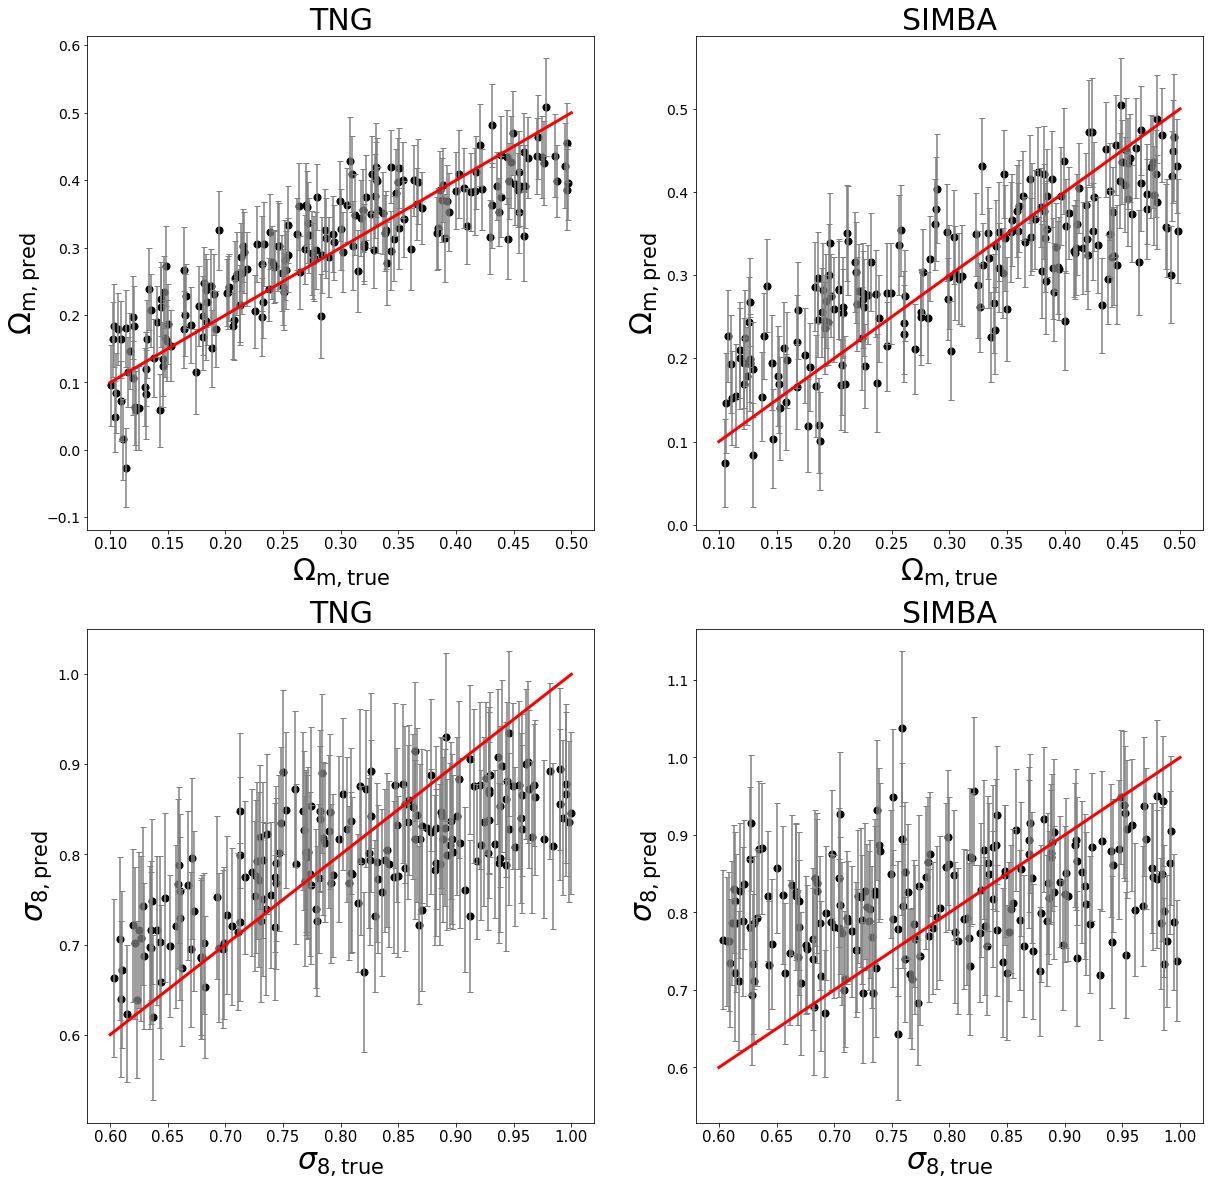

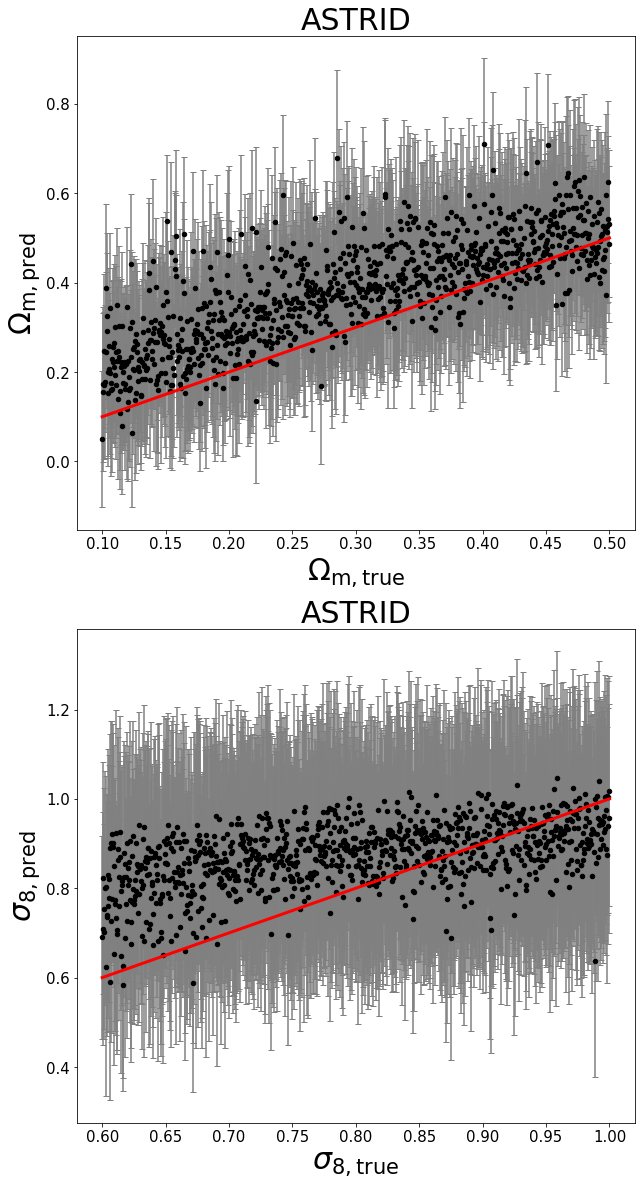

In [32]:
field = 'T';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=metric, which_machine='vib+cls',num_trial=9,print_loss=False)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)

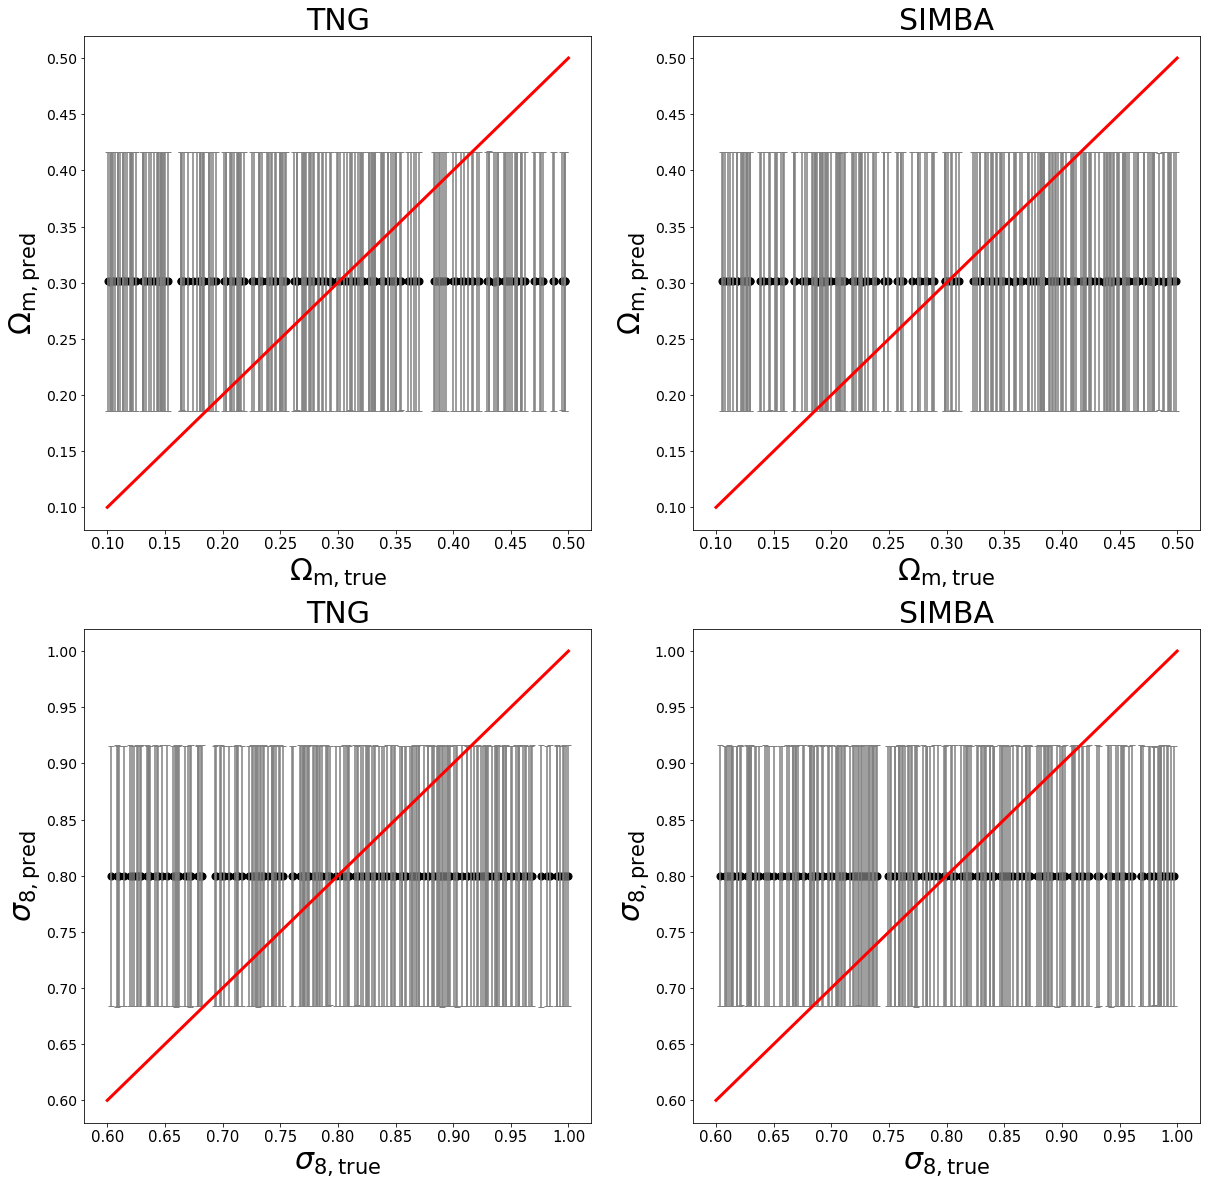

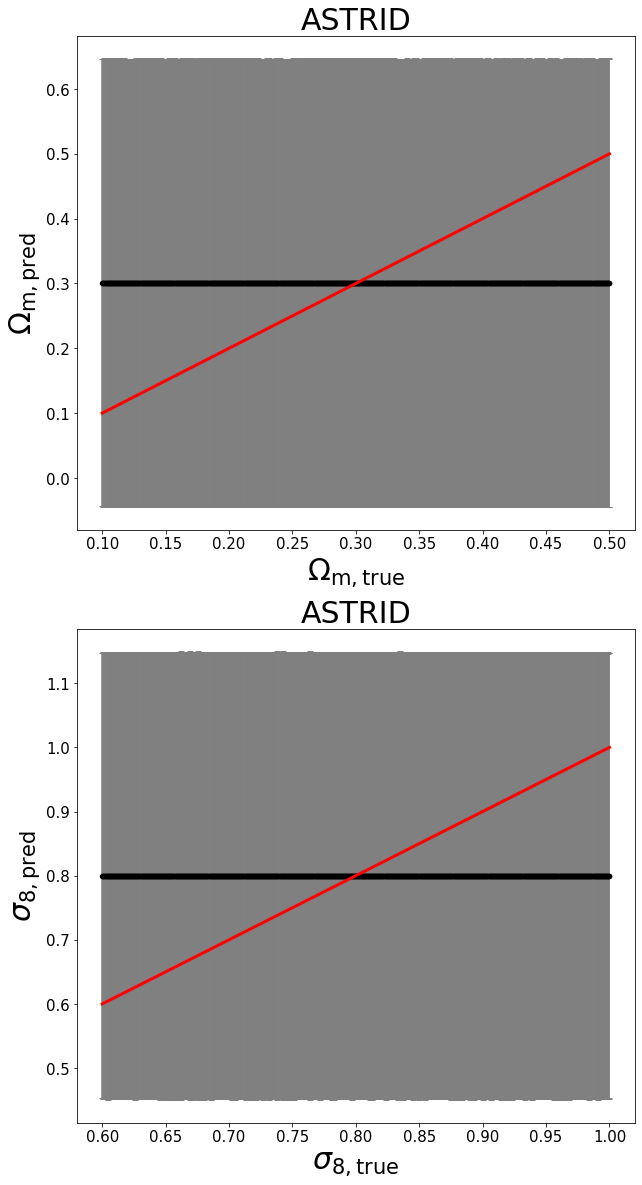

In [31]:
field = 'HI';
study_name = "TNG_SIMBA_{}".format(field)
storage    = "sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/opt_VIB.db"
mist = MIST(sim=["TNG","SIMBA"],field=field, extended_L=False)
mist.load_optuna_models(storage=storage,study_name=study_name ,metric=metric, which_machine='vib+cls',num_trial=None,print_loss=False)
mist.make_plots(show_plot=True, data_return=False)
mist.test_on(sims="ASTRID", fname="0.01", data_return=False,show_plot=True, show_score=False, save_plot=False)